<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/Nutrients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
year = ['2021', '2022', '2023']
nutrients = ['Phosphate', 'Nitrate', 'Ammonia', 'Silica']
station_no = np.arange(1, 11)

In [ ]:
data = {
    'Station': station_no,
    'C21_PO4': [0.09, 0.05, 0.03, 0.13, 0.11, 0.40, 0.10, 0.05, 0.11, 0.12],
    'C21_NO3': [1.20, 1.00, 1.00, 1.30, 1.00, 1.20, 0.80, 1.10, 1.10, 0.90],
    'C21_NH3': [0.04, 0.05, 0.04, 0.19, 0.03, 0.03, 0.02, 0.09, 0.04, 0.09],
    'C21_SiO2': [0.38, 0.26, 0.23, 0.22, 0.29, 0.26, 0.34, 0.26, 0.11, 0.18],

    'C22_PO4': [0.61, 0.06, 0.05, 0.09, 0.07, 0.13, 0.03, 0.04, 0.07, 0.06],
    'C22_NO3': [1.30, 1.10, 1.30, 1.20, 1.13, 1.10, 1.00, 1.10, 1.13, 1.20],
    'C22_NH3': [0.06, 0.16, 0.06, 0.19, 0.14, 0.05, 0.03, 0.03, 0.13, 0.05],
    'C22_SiO2': [0.26, 0.14, 0.26, 0.31, 0.17, 0.31, 0.37, 0.39, 0.18, 0.28],

    'C23_PO4': [0.03, 0.03, 0.03, 0.06, 0.02, 0.02, 0.04, 0.04, 0.10, 0.09],
    'C23_NO3': [1.00, 1.30, 1.20, 0.90, 1.00, 1.10, 1.10, 1.10, 0.90, 1.00],
    'C23_NH3': [0.13, 0.19, 0.09, 0.04, 0.15, 0.03, 0.05, 0.04, 0.04, 0.04],
    'C23_SiO2': [0.28, 0.25, 0.24, 0.24, 0.23, 0.23, 0.23, 0.21, 0.22, 0.21]
}

In [ ]:
df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Station', var_name='Year_Nutrient', value_name='Concentration')
df_melted['Year'] = df_melted['Year_Nutrient'].apply(lambda x: x.split('_')[0])
df_melted['Nutrient'] = df_melted['Year_Nutrient'].apply(lambda x: x.split('_')[1])

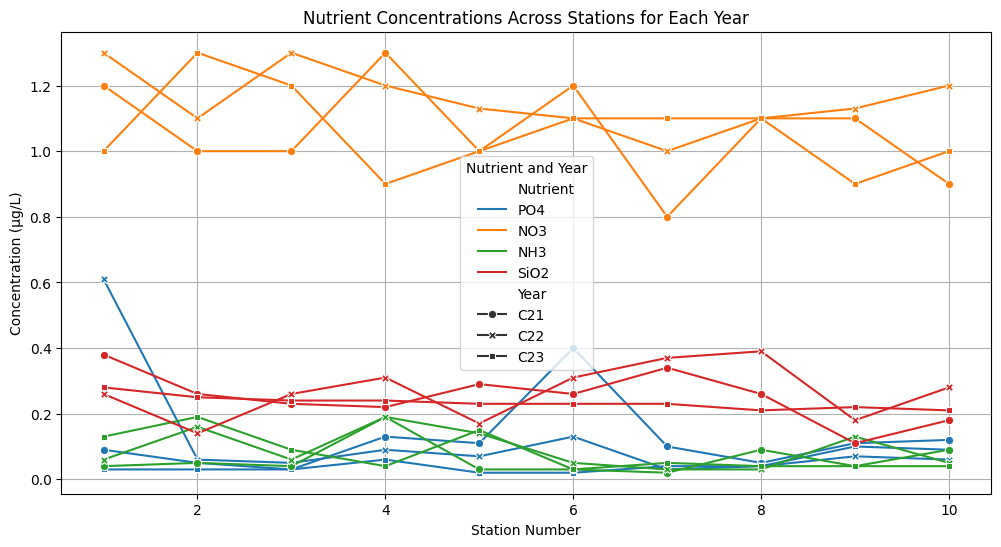

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Station', y='Concentration', hue='Nutrient', style='Year', markers=True, dashes=False)
plt.title('Nutrient Concentrations Across Stations for Each Year')
plt.xlabel('Station Number')
plt.ylabel('Concentration (µg/L)')
plt.legend(title='Nutrient and Year')
plt.grid()
plt.show()

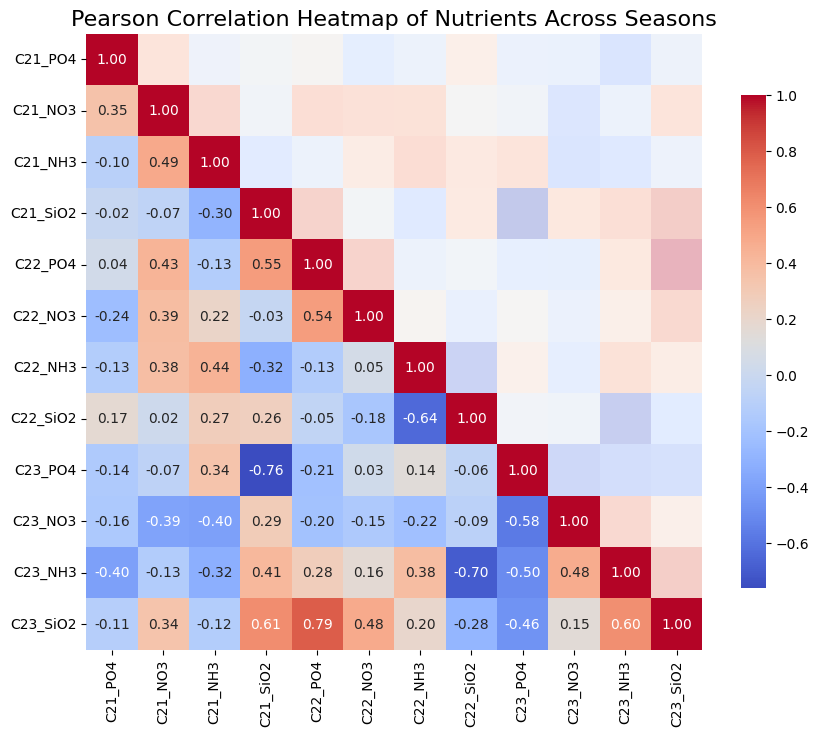

In [ ]:
# Compute Pearson correlation matrix
correlation_matrix = df.drop('Station', axis=1).corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
sns.heatmap(correlation_matrix, mask=~mask, annot=False, cmap='coolwarm', square=True, cbar=False, alpha=0.3)

plt.title('Pearson Correlation Heatmap of Nutrients Across Seasons', fontsize=16)
plt.show()

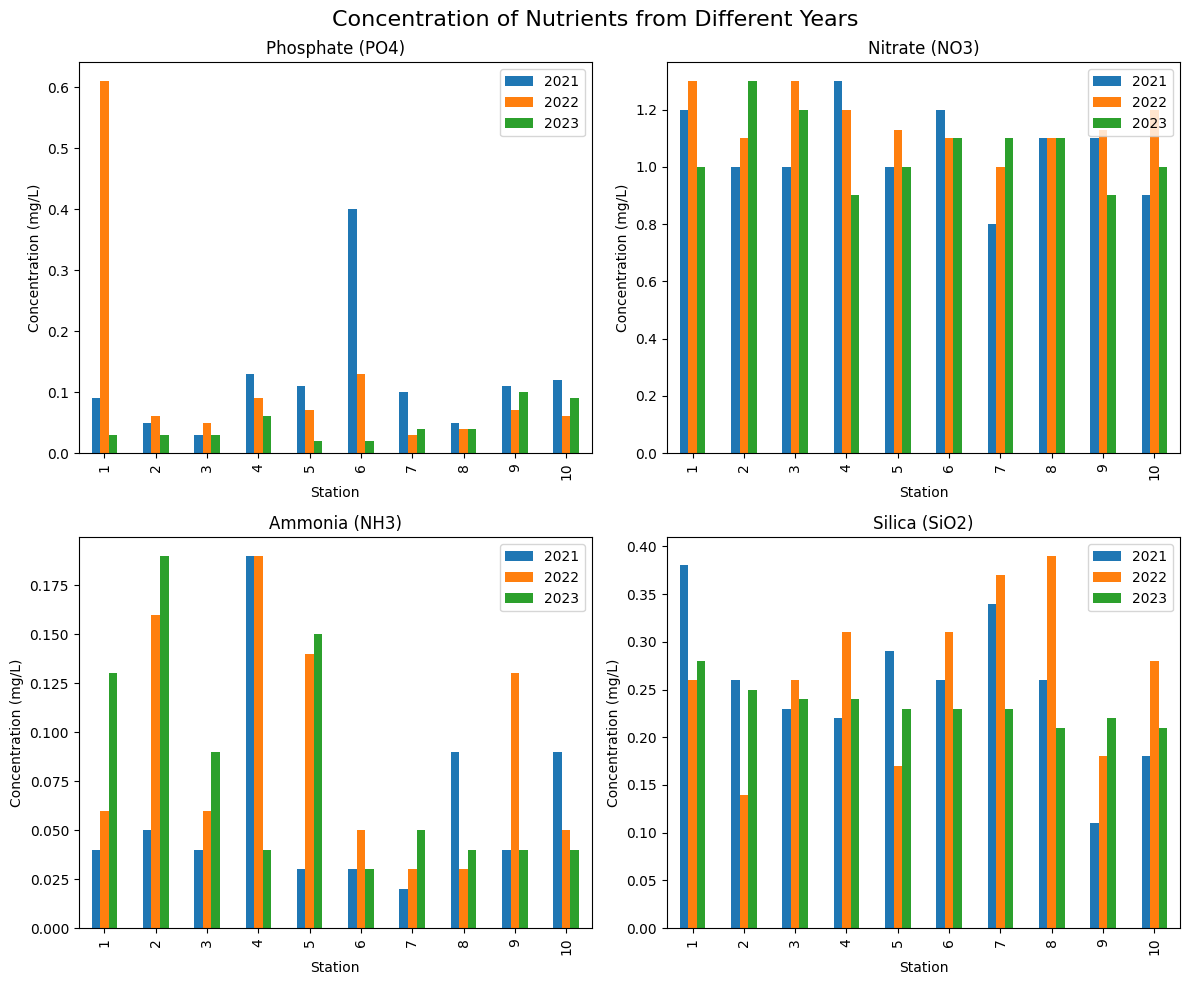

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
df.set_index('Station', inplace=True)
labels = ['2021', '2022', '2023']

df[['C21_PO4', 'C22_PO4', 'C23_PO4']].plot(kind='bar', ax=axes[0, 0], title='Phosphate (PO4)', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0, 0].legend(labels)  # Set custom legend labels
df[['C21_NO3', 'C22_NO3', 'C23_NO3']].plot(kind='bar', ax=axes[0, 1], title='Nitrate (NO3)', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0, 1].legend(labels)  # Set custom legend labels
df[['C21_NH3', 'C22_NH3', 'C23_NH3']].plot(kind='bar', ax=axes[1, 0], title='Ammonia (NH3)', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 0].legend(labels)  # Set custom legend labels
df[['C21_SiO2', 'C22_SiO2', 'C23_SiO2']].plot(kind='bar', ax=axes[1, 1], title='Silica (SiO2)', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1, 1].legend(labels)  # Set custom legend labels

for ax in axes.flat:
    ax.set_xlabel('Station')
    ax.set_ylabel('Concentration (mg/L)')

fig.suptitle('Concentration of Nutrients from Different Years', fontsize=16)
plt.tight_layout()
plt.show()